In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline

In [41]:
df_train = pd.read_csv('train.csv')
#df_test = pd.read_csv('test.csv')

In [42]:
df_train.shape

(614, 13)

In [43]:
#df_test.shape

In [44]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [45]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [46]:
df_train["Gender"] = df_train["Gender"].fillna(
df_train["Gender"].dropna().mode().values[0] )
df_train["Married"] = df_train["Married"].fillna(
df_train["Married"].dropna().mode().values[0] )
df_train["Dependents"] = df_train["Dependents"].fillna(
df_train["Dependents"].dropna().mode().values[0] )
df_train["Self_Employed"] = df_train["Self_Employed"].fillna(
df_train["Self_Employed"].dropna().mode().values[0] )
df_train["LoanAmount"] = df_train["LoanAmount"].fillna(
df_train["LoanAmount"].dropna().median() )
df_train["Loan_Amount_Term"] = df_train["Loan_Amount_Term"].fillna(
df_train["Loan_Amount_Term"].dropna().mode().values[0] )
df_train["Credit_History"] = df_train["Credit_History"].fillna(
df_train["Credit_History"].dropna().mode().values[0] )

In [47]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_data.head(20)

,Total,Percent
Loan_ID,0,0.0
Gender,0,0.0
Married,0,0.0
Dependents,0,0.0
Education,0,0.0
Self_Employed,0,0.0
ApplicantIncome,0,0.0
CoapplicantIncome,0,0.0
LoanAmount,0,0.0
Loan_Amount_Term,0,0.0


In [48]:
df_train.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

# Exploratory Data Analysis: We want to show the power of visualizations

<AxesSubplot:xlabel='count', ylabel='Gender'>

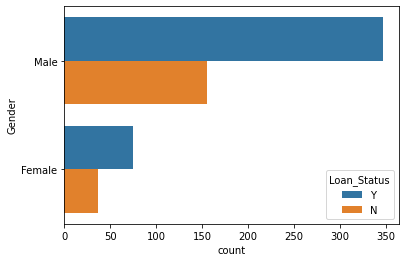

In [49]:
sns.countplot(y = 'Gender', hue = 'Loan_Status', data = df_train)

More males are on loan than females. Also, those that are on loan are more than otherwise

<AxesSubplot:xlabel='count', ylabel='Married'>

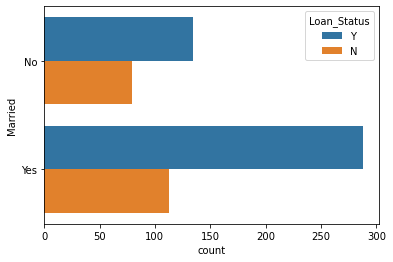

In [50]:
sns.countplot(y = 'Married', hue = 'Loan_Status', data = df_train)

Married people collect more loan than unmarried

<AxesSubplot:xlabel='count', ylabel='Self_Employed'>

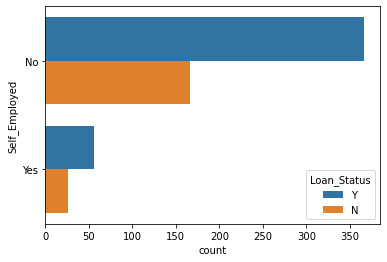

In [51]:
sns.countplot(y = 'Self_Employed', hue = 'Loan_Status', data = df_train)

The category of those that take loans is less of self-employed people. That’s those are not self-employed probably salalary earners obtain more loan.

<AxesSubplot:xlabel='count', ylabel='Credit_History'>

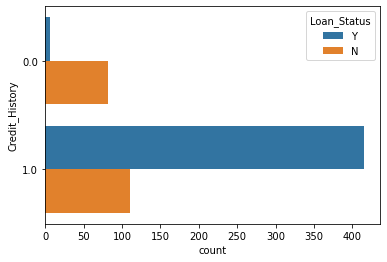

In [52]:
sns.countplot(y = 'Credit_History', hue = 'Loan_Status', data = df_train)

According to the credit history, greater number of people pay back their loans.

<AxesSubplot:xlabel='count', ylabel='Property_Area'>

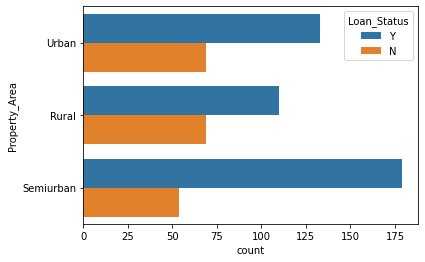

In [53]:
sns.countplot(y = 'Property_Area', hue = 'Loan_Status', data = df_train)

Semiurban obtain more loan, folowed by Urban and then rural. This is logical!

<AxesSubplot:xlabel='count', ylabel='Loan_Amount_Term'>

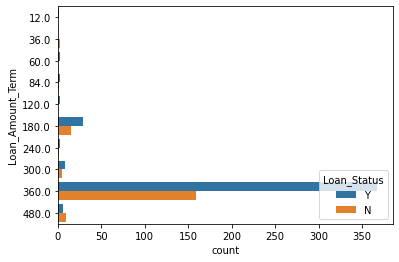

In [54]:
sns.countplot(y = 'Loan_Amount_Term', hue = 'Loan_Status', data = df_train)

An extremely high number of them go for a 360 cyclic loan term. That’s pay back within a year

C:\Users\i_fed\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


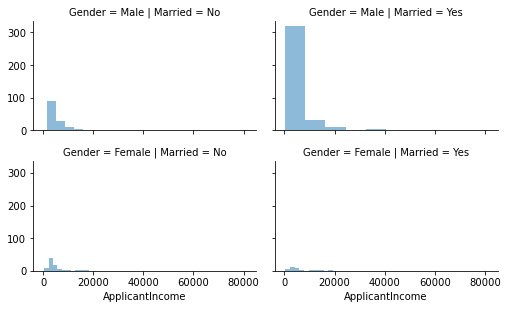

In [55]:
grid = sns.FacetGrid(df_train, row='Gender', col='Married', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

Males generally have the highest income. Explicitly, Males that are married have greater income that unmarried male. Sensible!

C:\Users\i_fed\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


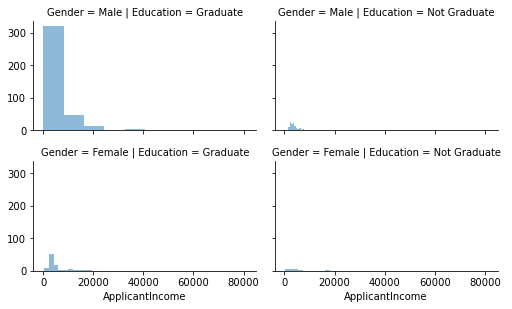

In [56]:
grid = sns. FacetGrid(df_train, row = 'Gender', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

A graduate who is a male has more income

C:\Users\i_fed\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


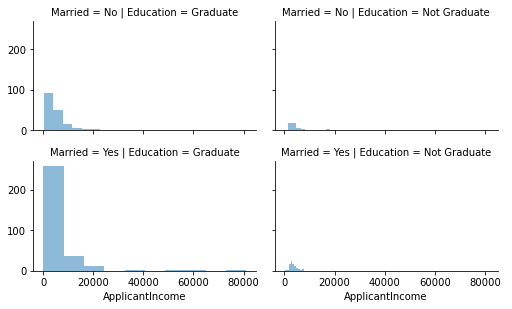

In [57]:
grid = sns. FacetGrid(df_train, row = 'Married', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

A graduate and married individual has more income

C:\Users\i_fed\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


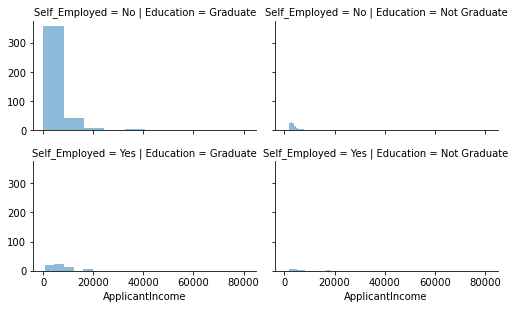

In [58]:
grid = sns. FacetGrid(df_train, row = 'Self_Employed', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

A graduate but not self-employed has more income

C:\Users\i_fed\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


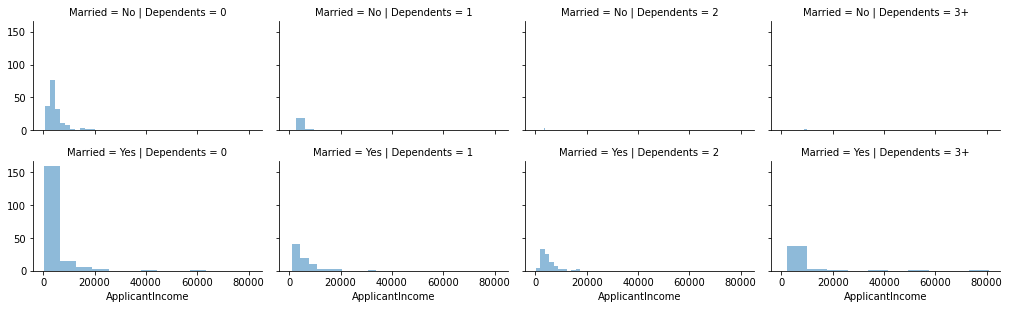

In [59]:
grid = sns. FacetGrid(df_train, row = 'Married', col='Dependents', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

Not married and no one is dependent on such has more income. Also, Married and no one dependent has greater income with a decreasing effect as the dependents increases

C:\Users\i_fed\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


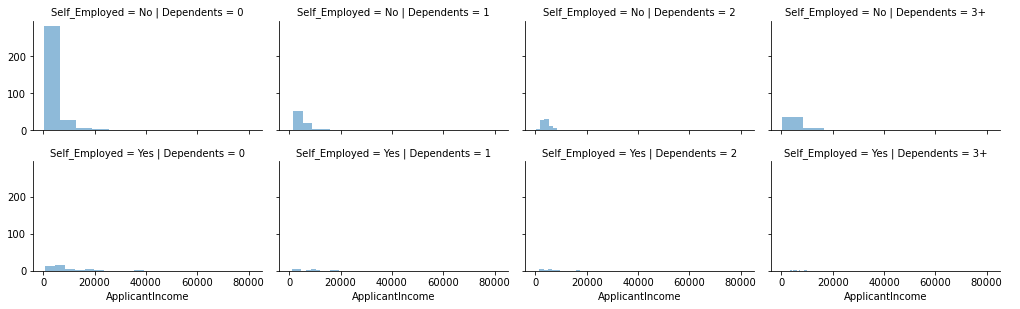

In [60]:
grid = sns. FacetGrid(df_train, row = 'Self_Employed', col='Dependents', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

No one is dependent and self-employed has more income

C:\Users\i_fed\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


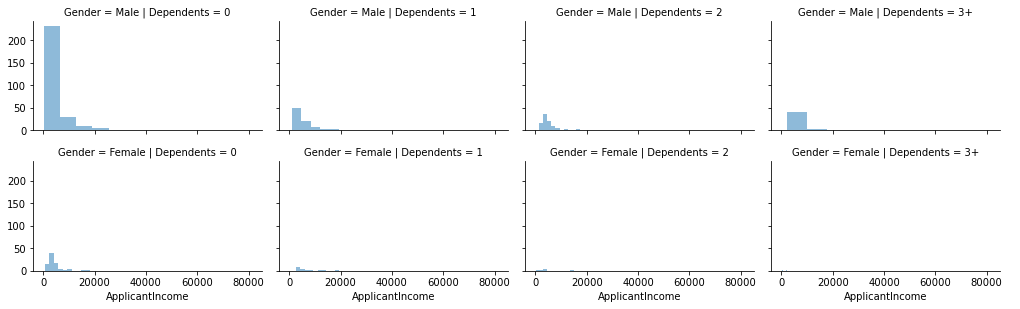

In [61]:
grid = sns. FacetGrid(df_train, row = 'Gender', col='Dependents', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

No one is dependent and a male tremendously has more income

C:\Users\i_fed\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


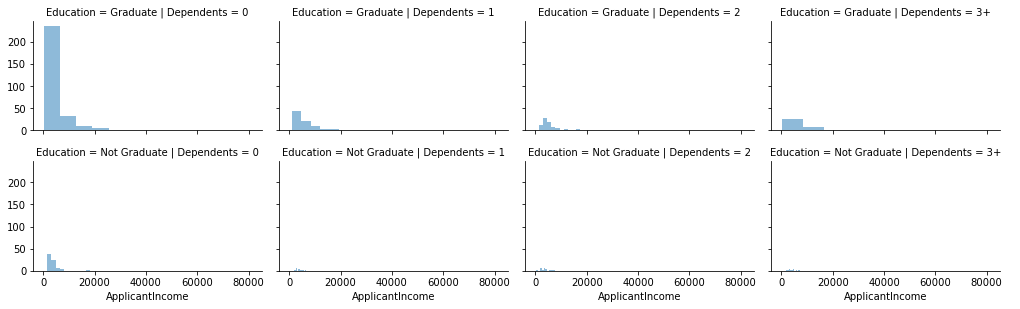

In [62]:
grid = sns. FacetGrid(df_train, row = 'Education', col='Dependents', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

A graduate with no one dependent has more income

C:\Users\i_fed\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


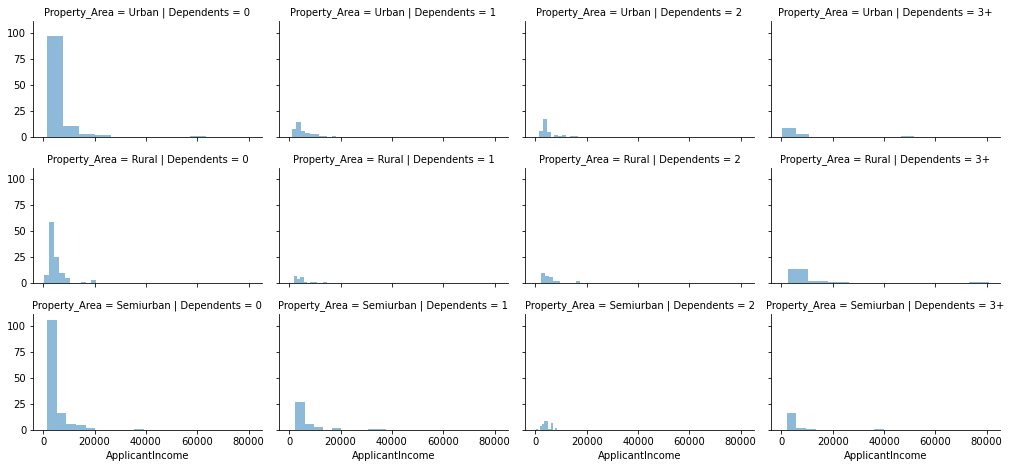

In [63]:
grid = sns. FacetGrid(df_train, row = 'Property_Area', col='Dependents', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

No one is dependent and have property in urban, rural and semiurban has more income

C:\Users\i_fed\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


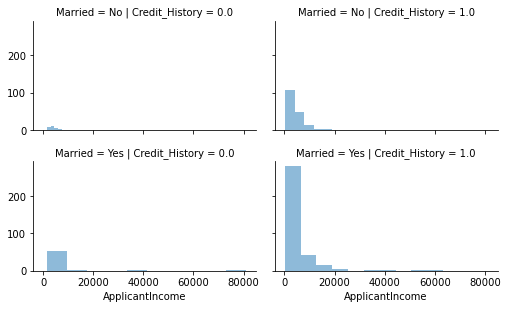

In [64]:
grid = sns. FacetGrid(df_train, row = 'Married', col='Credit_History', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

Married and has a good credit history depicts more income. Also, Not married but has a good credit history follows in the hierarchy.

C:\Users\i_fed\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


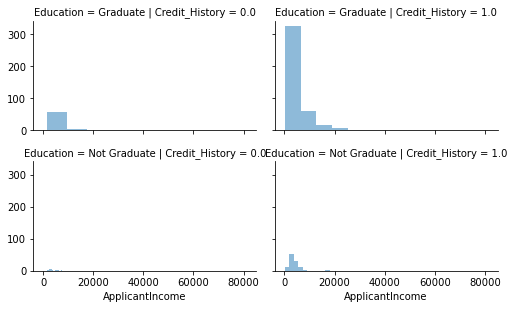

In [65]:
grid = sns. FacetGrid(df_train, row = 'Education', col='Credit_History', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

Educated with good credit history depicts a good income. Also, not a graduate and have a good credit history can be traced to having a better income than a fellow with no degree

# Encoding to numeric data; getting ready for training

In [66]:
code_numeric = {"Male": 1, 
                "Female": 2,
                "Yes": 1, "No": 2,
                "Graduate": 1, "Not Graduate": 2,
                "Urban": 3, "Semiurban": 2,"Rural": 1,
                "Y": 1, "N": 0,
                "3+": 3}

df_train = df_train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

#df_test = df_test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

#drop the uniques loan id
df_train.drop("Loan_ID", axis = 1, inplace = True)

In [67]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB


In [68]:
# Convert "Dependents" feature to numeric using pd.to_numeric

Dependents_ = pd.to_numeric(df_train.Dependents)
# Dependents__ = pd.to_numeric(df_test.Dependents)
df_train.drop(['Dependents'], axis = 1, inplace = True)
# df_test.drop(['Dependents'], axis = 1, inplace = True)
df_train = pd.concat([df_train, Dependents_], axis = 1)
# df_test = pd.concat([df_test, Dependents__], axis = 1)

In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


<AxesSubplot:>

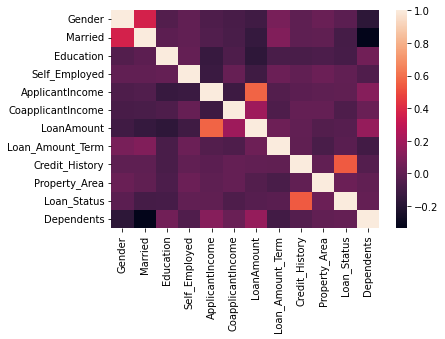

In [70]:
# Heatmap showing the correlations of features with the target.
# No correlations arre extremely high.
# The correlations between LoanAmount and ApplicantIncome can be explained.

sns.heatmap(df_train.corr())

# Separating Target from the feature for training

In [115]:
y = df_train["Loan_Status"]
LSY= df_train["Loan_Status"]
X = df_train.drop("Loan_Status", axis = 1)
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Using Logistic Regression

In [72]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\i_fed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
ypred = model.predict(X_test)
print(ypred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [79]:
X_test.shape

(123, 11)

In [80]:
evaluation = f1_score(y_test, ypred)
evaluation

0.8979591836734695

# Using Decision Tree

In [81]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [82]:
ypred_tree = tree.predict(X_test)
print(ypred_tree)

[0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0
 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 1 0 0 1 1 1 0 1 0 0]


In [83]:
evaluation_tree = f1_score(y_test,ypred_tree)
evaluation_tree

0.7674418604651163

# Using Random Forecast Classifier

In [84]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [85]:
ypred_forest = forest.predict(X_test)
print(ypred_forest)

[1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]


In [86]:
evaluation_forest = f1_score(y_test, ypred_forest)
evaluation_forest

0.8645833333333334

In [119]:
#recreating the original dataset with applied ML prediction status

#adding the column with probablity number
Combined_df = pd.concat([X_train, X_test])
probabilityPayBack = pd.DataFrame(model.predict_proba(Combined_df))[1]

# Combined_df = pd.concat([X_train, y_train])
# probabilityPayBack = pd.DataFrame(model.predict_proba(Combined_df))[1]

#adding the column with "yes/no 1/0"
New_Combined_df=pd.concat([Combined_df, probabilityPayBack], axis = 1, sort = False)
StatusPayBack = pd.DataFrame(model.predict(Combined_df))
New_CombinedStatus_df=pd.concat([New_Combined_df, StatusPayBack], axis = 1, sort = False)

#add Loan_Status given from original dataset
New_New_CombinedStatus_df=pd.concat([New_CombinedStatus_df, LSY], axis = 1, sort = False)
New_New_CombinedStatus_df


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents,1,0,Loan_Status
0,1,2,1,2,5849,0.0,128.0,360.0,1.0,3,0,0.791211,1,1
1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,1,0.754511,1,0
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,3,0,0.143699,0,1
3,1,1,2,2,2583,2358.0,120.0,360.0,1.0,3,0,0.899245,1,1
4,1,2,1,2,6000,0.0,141.0,360.0,1.0,3,0,0.794082,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2,2,1,2,2900,0.0,71.0,360.0,1.0,1,0,0.697654,1,1
610,1,1,1,2,4106,0.0,40.0,180.0,1.0,1,3,0.748685,1,1
611,1,1,1,2,8072,240.0,253.0,360.0,1.0,3,1,0.762677,1,1
612,1,1,1,2,7583,0.0,187.0,360.0,1.0,3,2,0.212285,0,1


In [129]:
New_New_CombinedStatus_df = New_New_CombinedStatus_df.rename(columns={0: "ML_Loan_Status"})
New_New_CombinedStatus_df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents,1,ML_Loan_Status,Loan_Status
0,1,2,1,2,5849,0.0,128.0,360.0,1.0,3,0,0.791211,1,1
1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,1,0.754511,1,0
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,3,0,0.143699,0,1
3,1,1,2,2,2583,2358.0,120.0,360.0,1.0,3,0,0.899245,1,1
4,1,2,1,2,6000,0.0,141.0,360.0,1.0,3,0,0.794082,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2,2,1,2,2900,0.0,71.0,360.0,1.0,1,0,0.697654,1,1
610,1,1,1,2,4106,0.0,40.0,180.0,1.0,1,3,0.748685,1,1
611,1,1,1,2,8072,240.0,253.0,360.0,1.0,3,1,0.762677,1,1
612,1,1,1,2,7583,0.0,187.0,360.0,1.0,3,2,0.212285,0,1


In [130]:
New_New_CombinedStatus_df.to_csv(r'final_data.csv')

# Conclusion

From the Exploratory Data Analysis, we could generate insight from the data. How each of the features relates to the target. Also, it can be seen from the evaluation of three models that Logistic Regression performed better than others, Random Forest did better than Decision Tree.